In [2]:
%load_ext autoreload

In [5]:
import random
import sys, os
import numpy as np
import pandas as pd
import seaborn as sns
sns.set(color_codes=True)
import matplotlib.pyplot as plt

if not "../data_processing" in sys.path:
    sys.path.append("../data_processing")

%autoreload
import ff_transform
import build_dataset


In [6]:
wt_instance = wt_instance = build_dataset.wt_data.load_instance("WTG02",load_minimal=False)


Loading WTG02...
Loaded WTG02


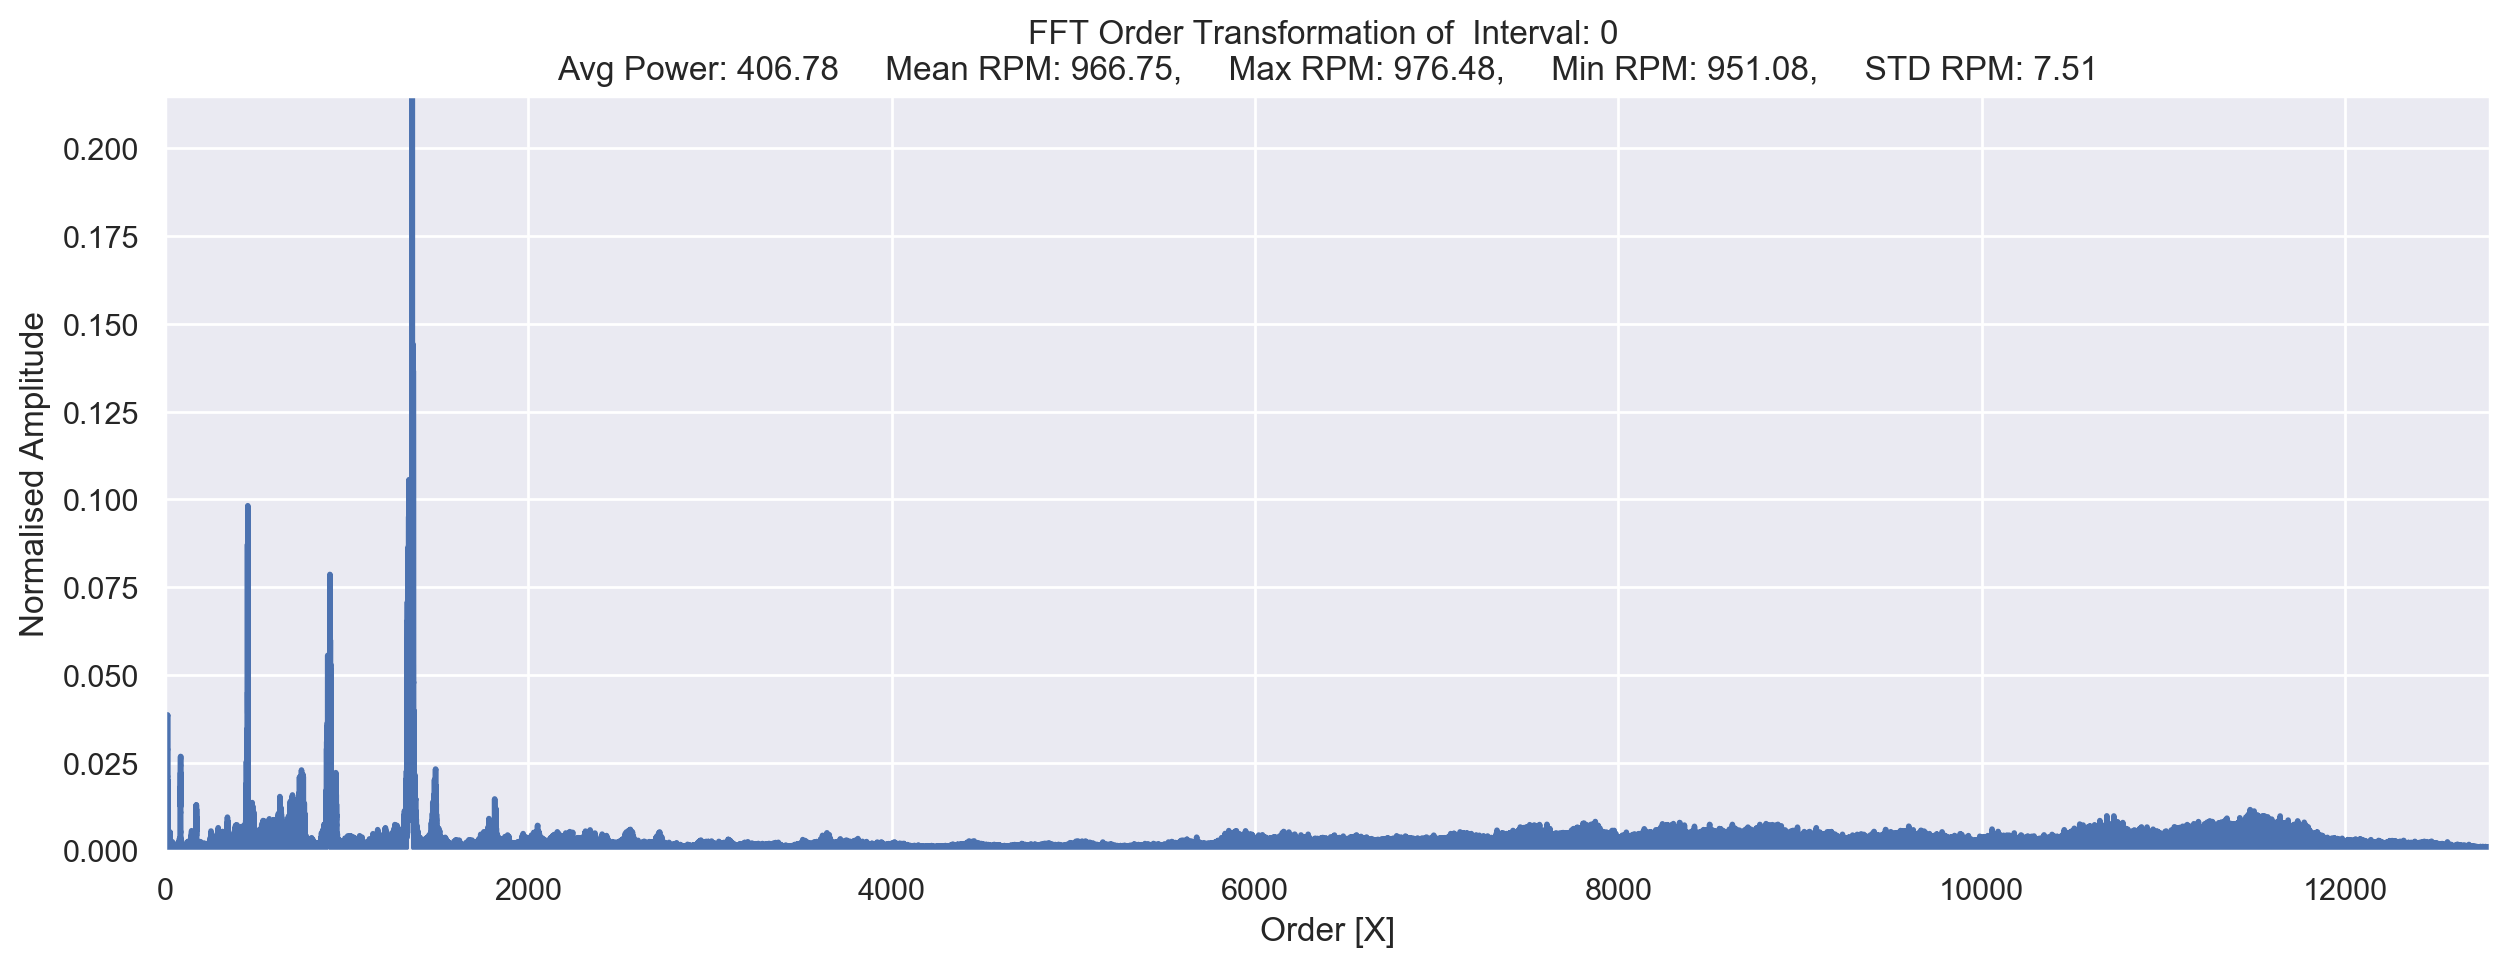

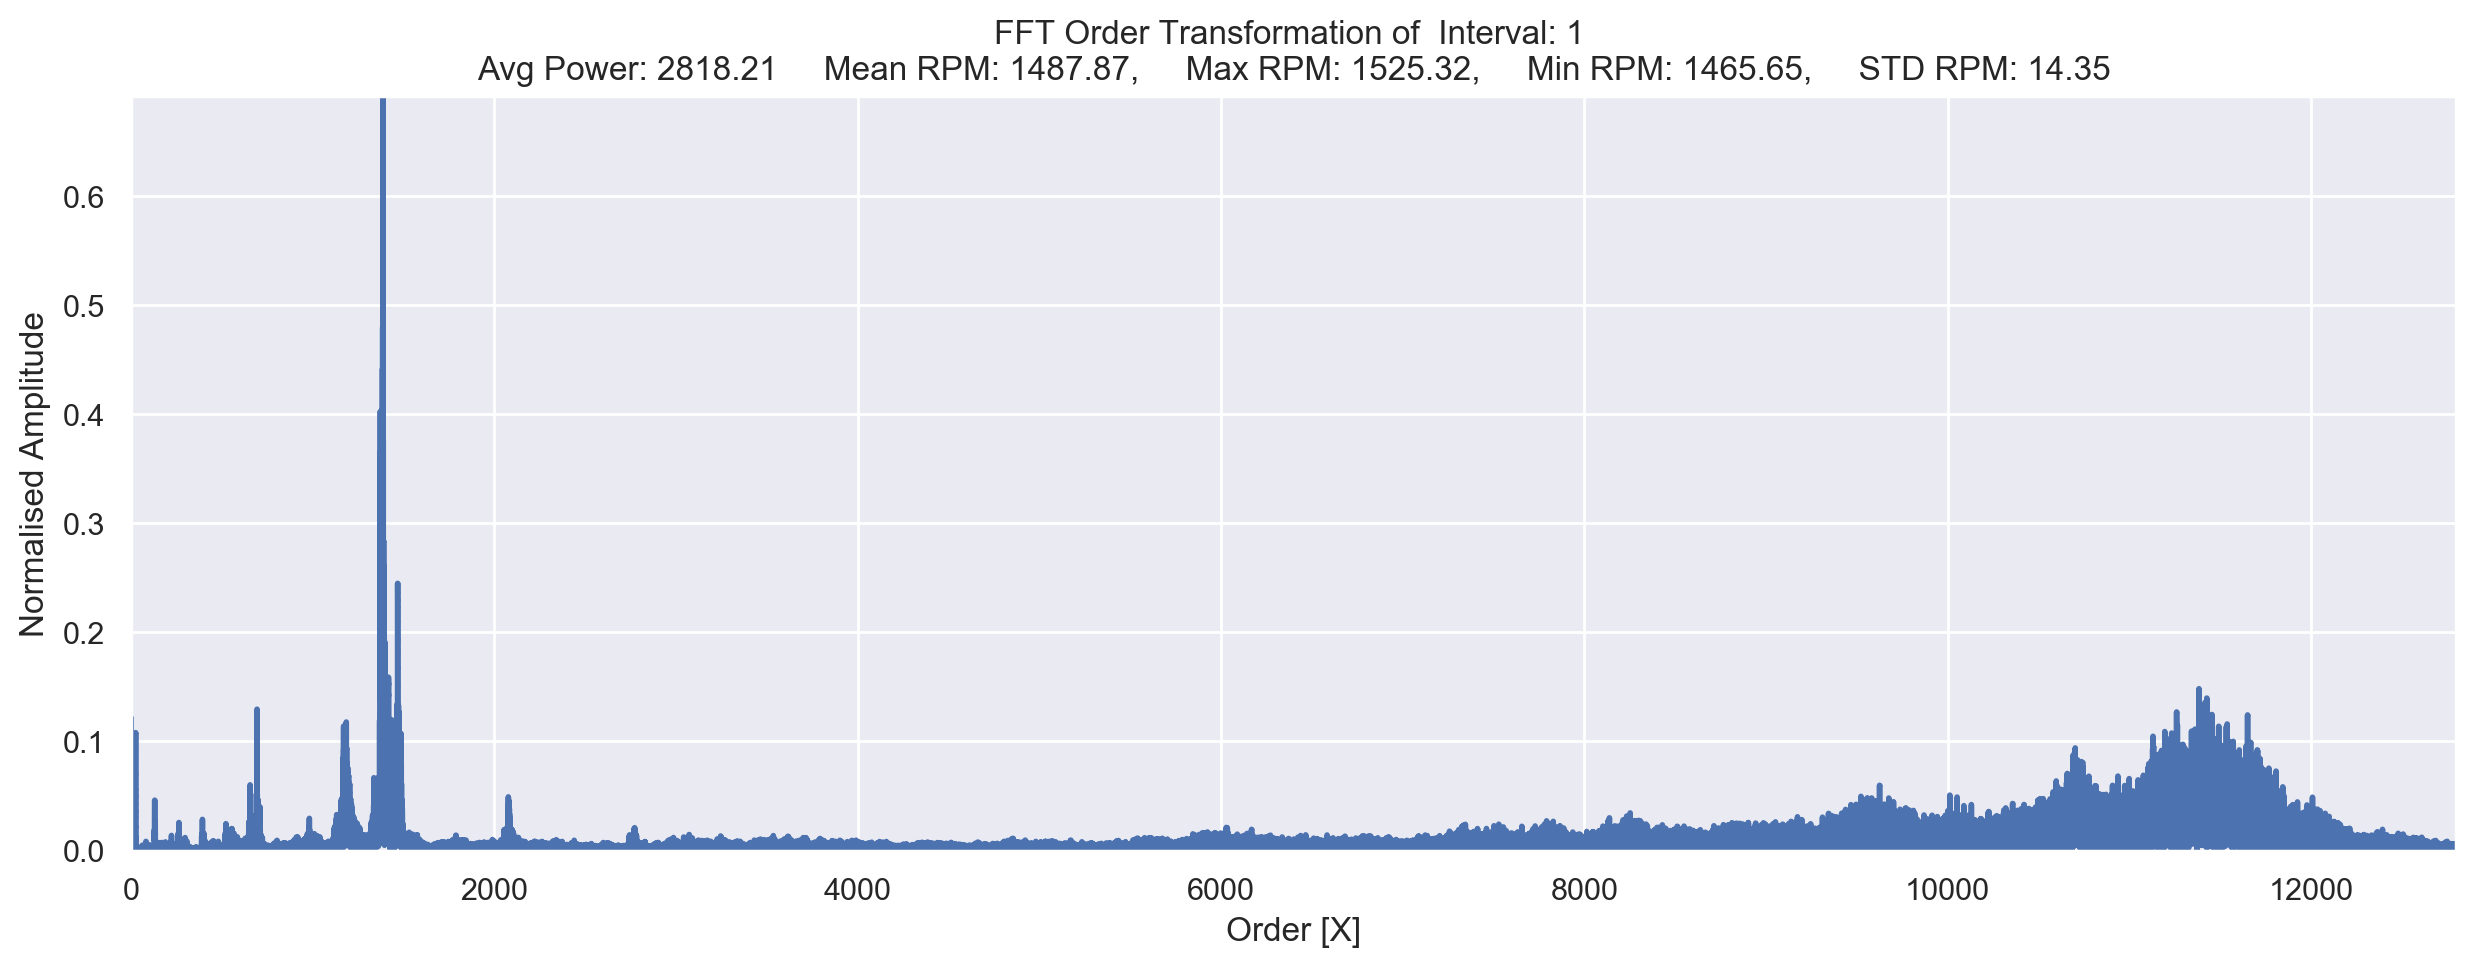

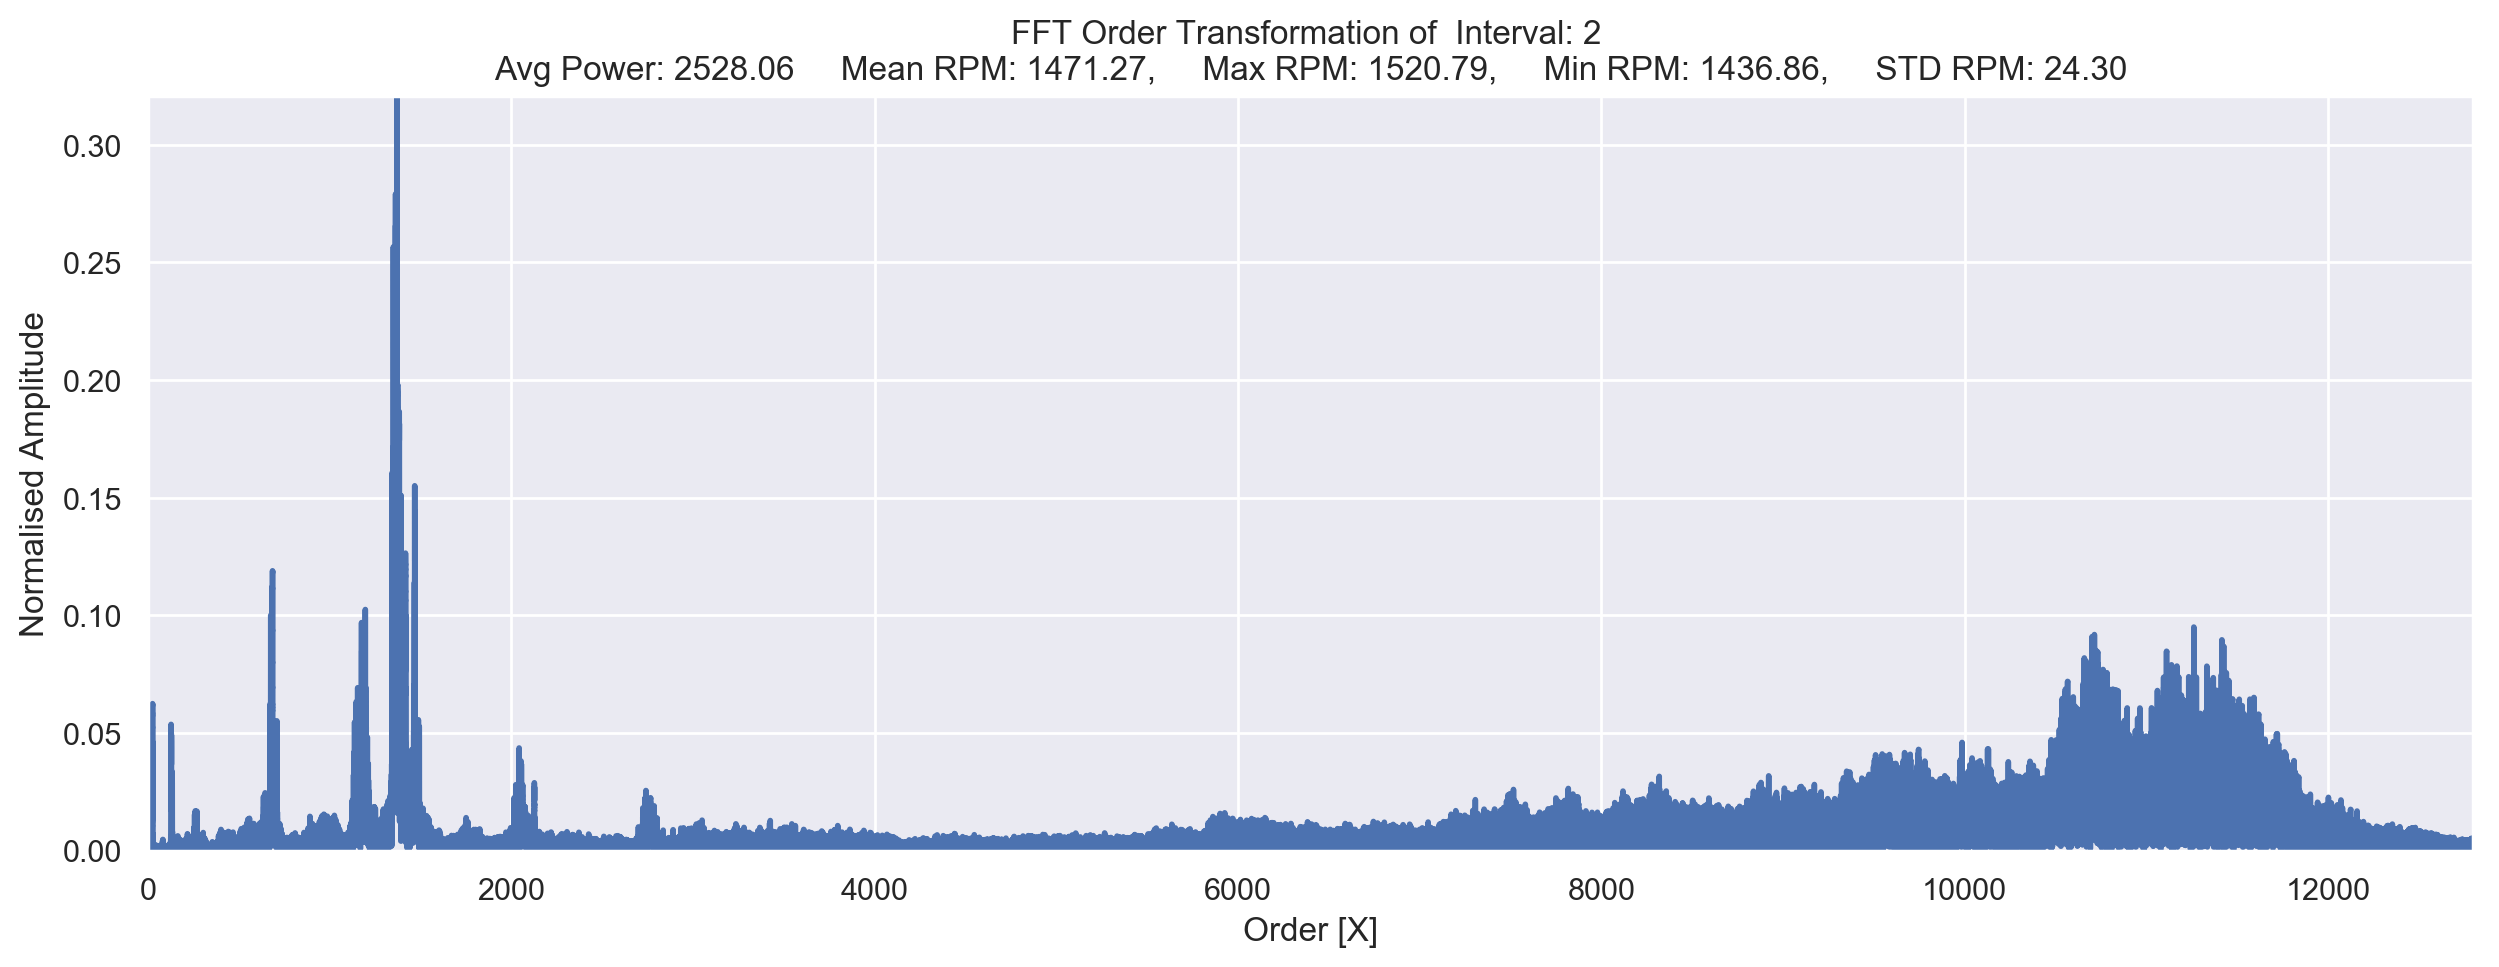

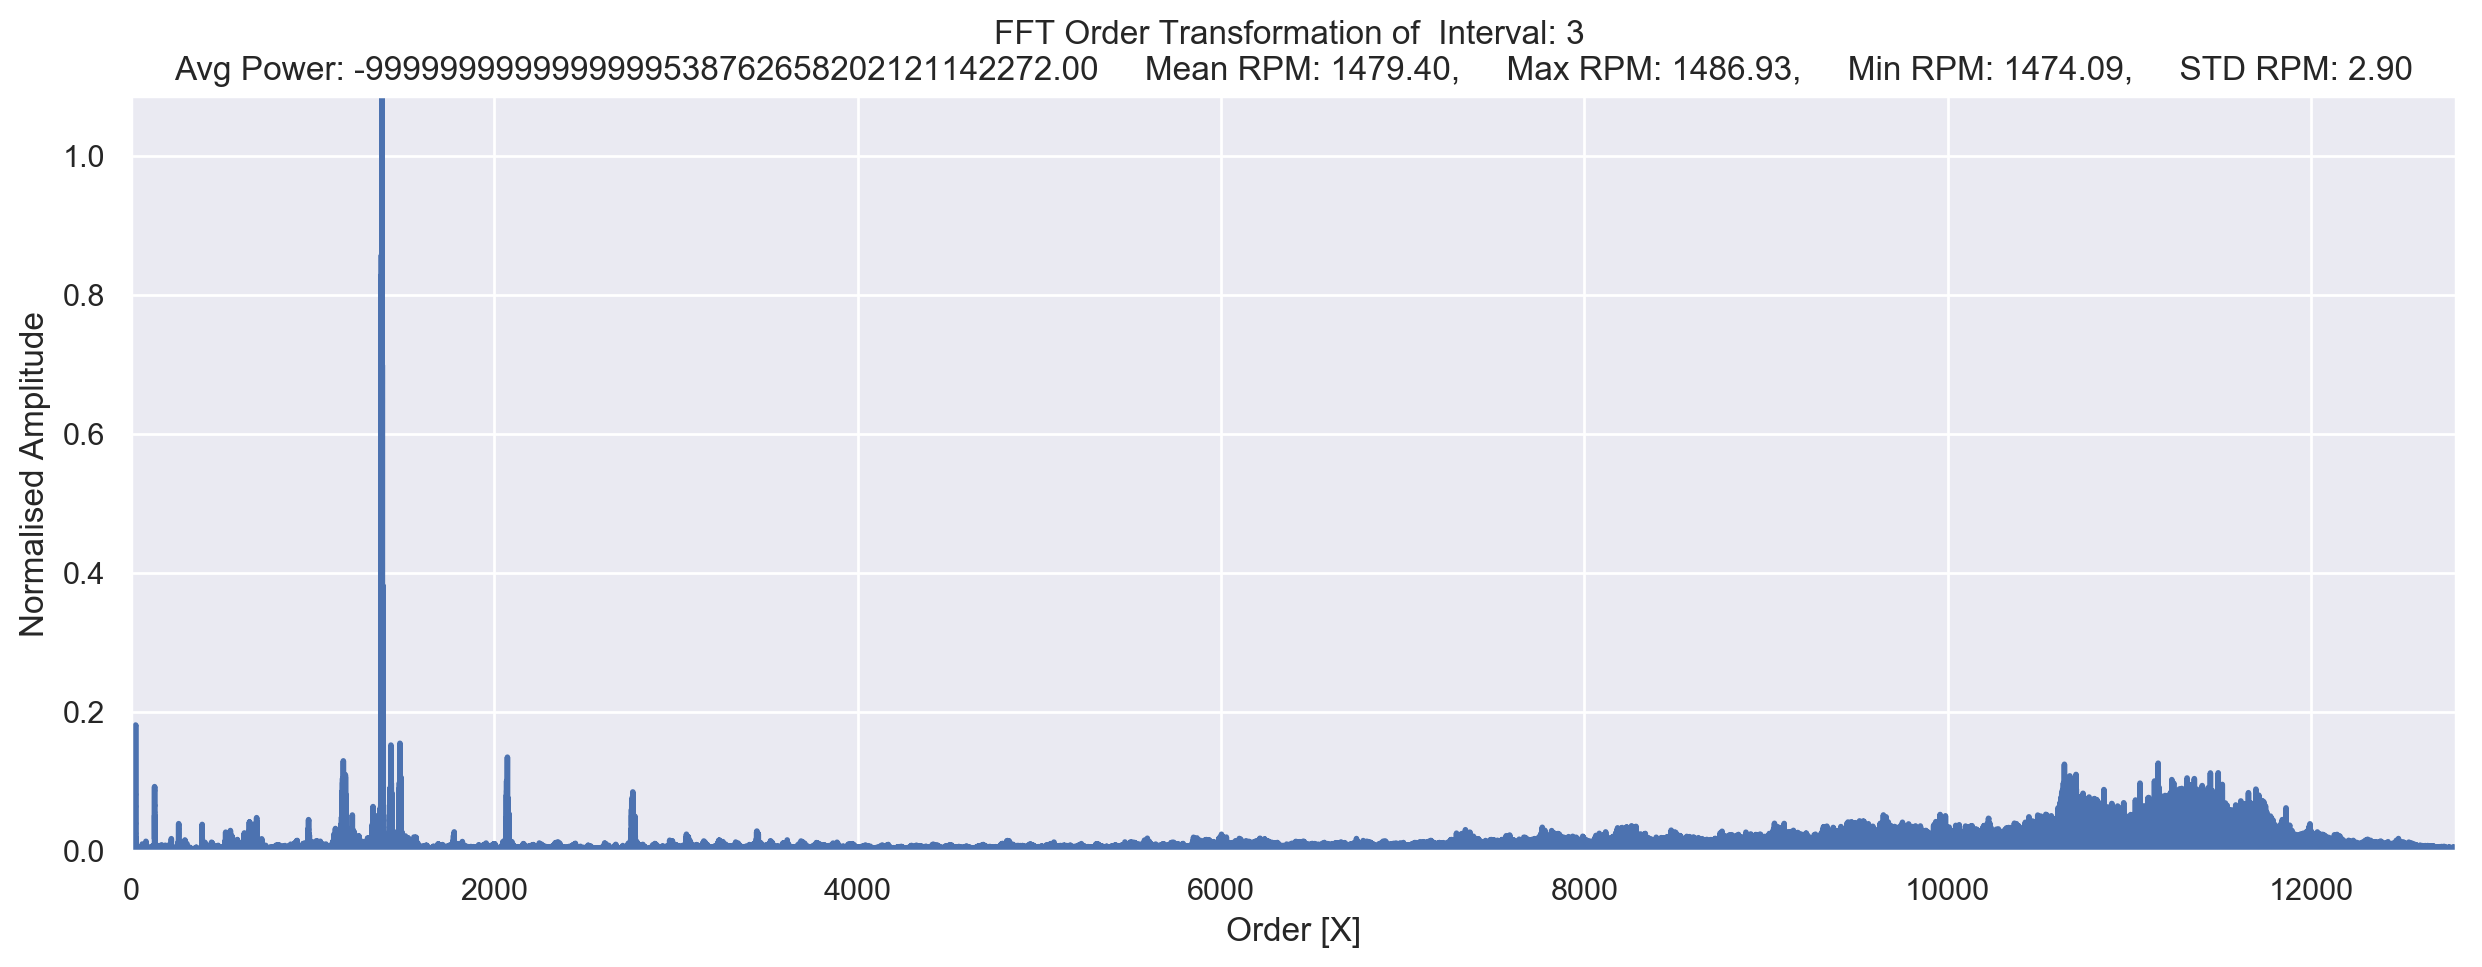

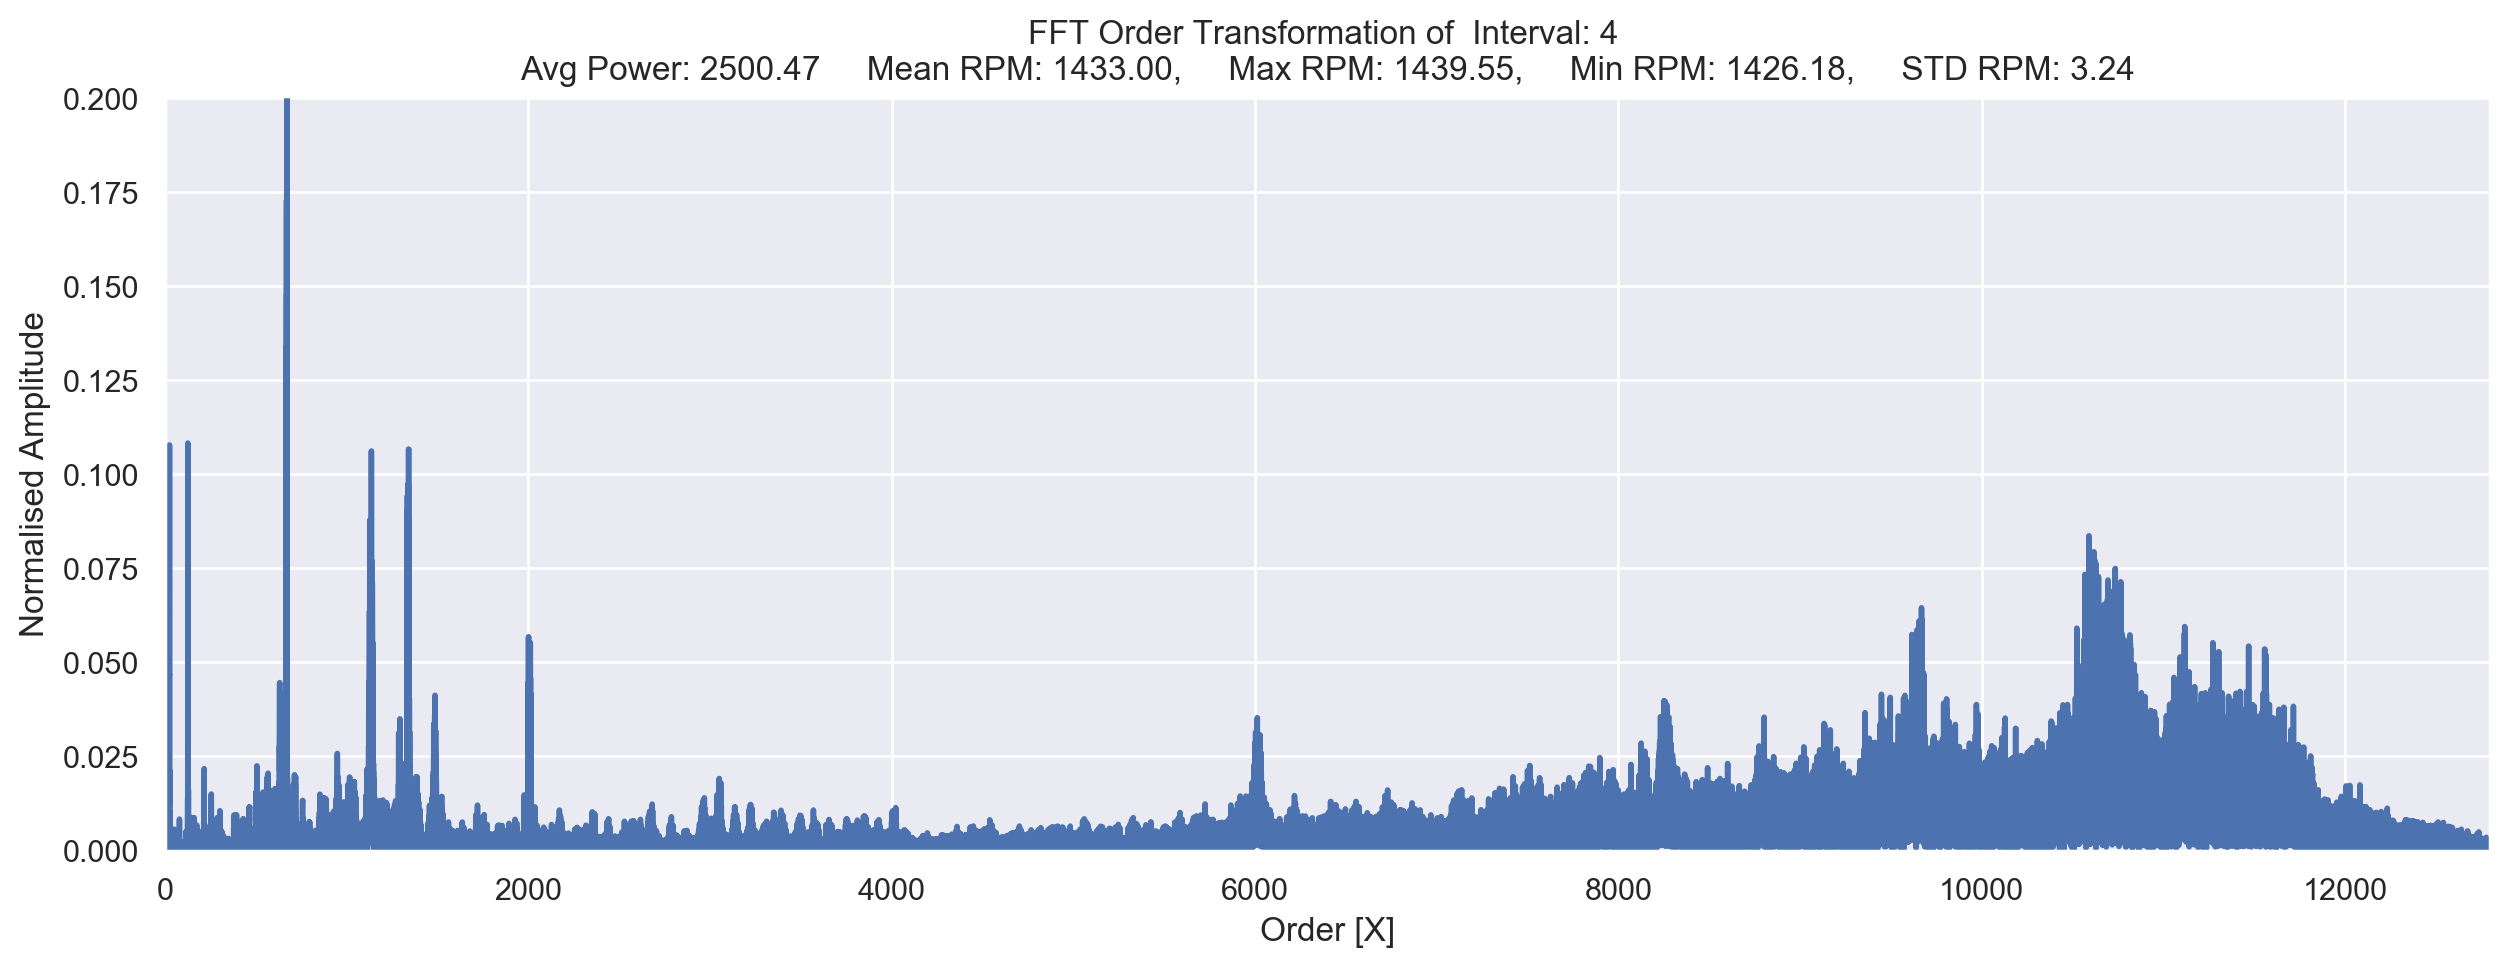

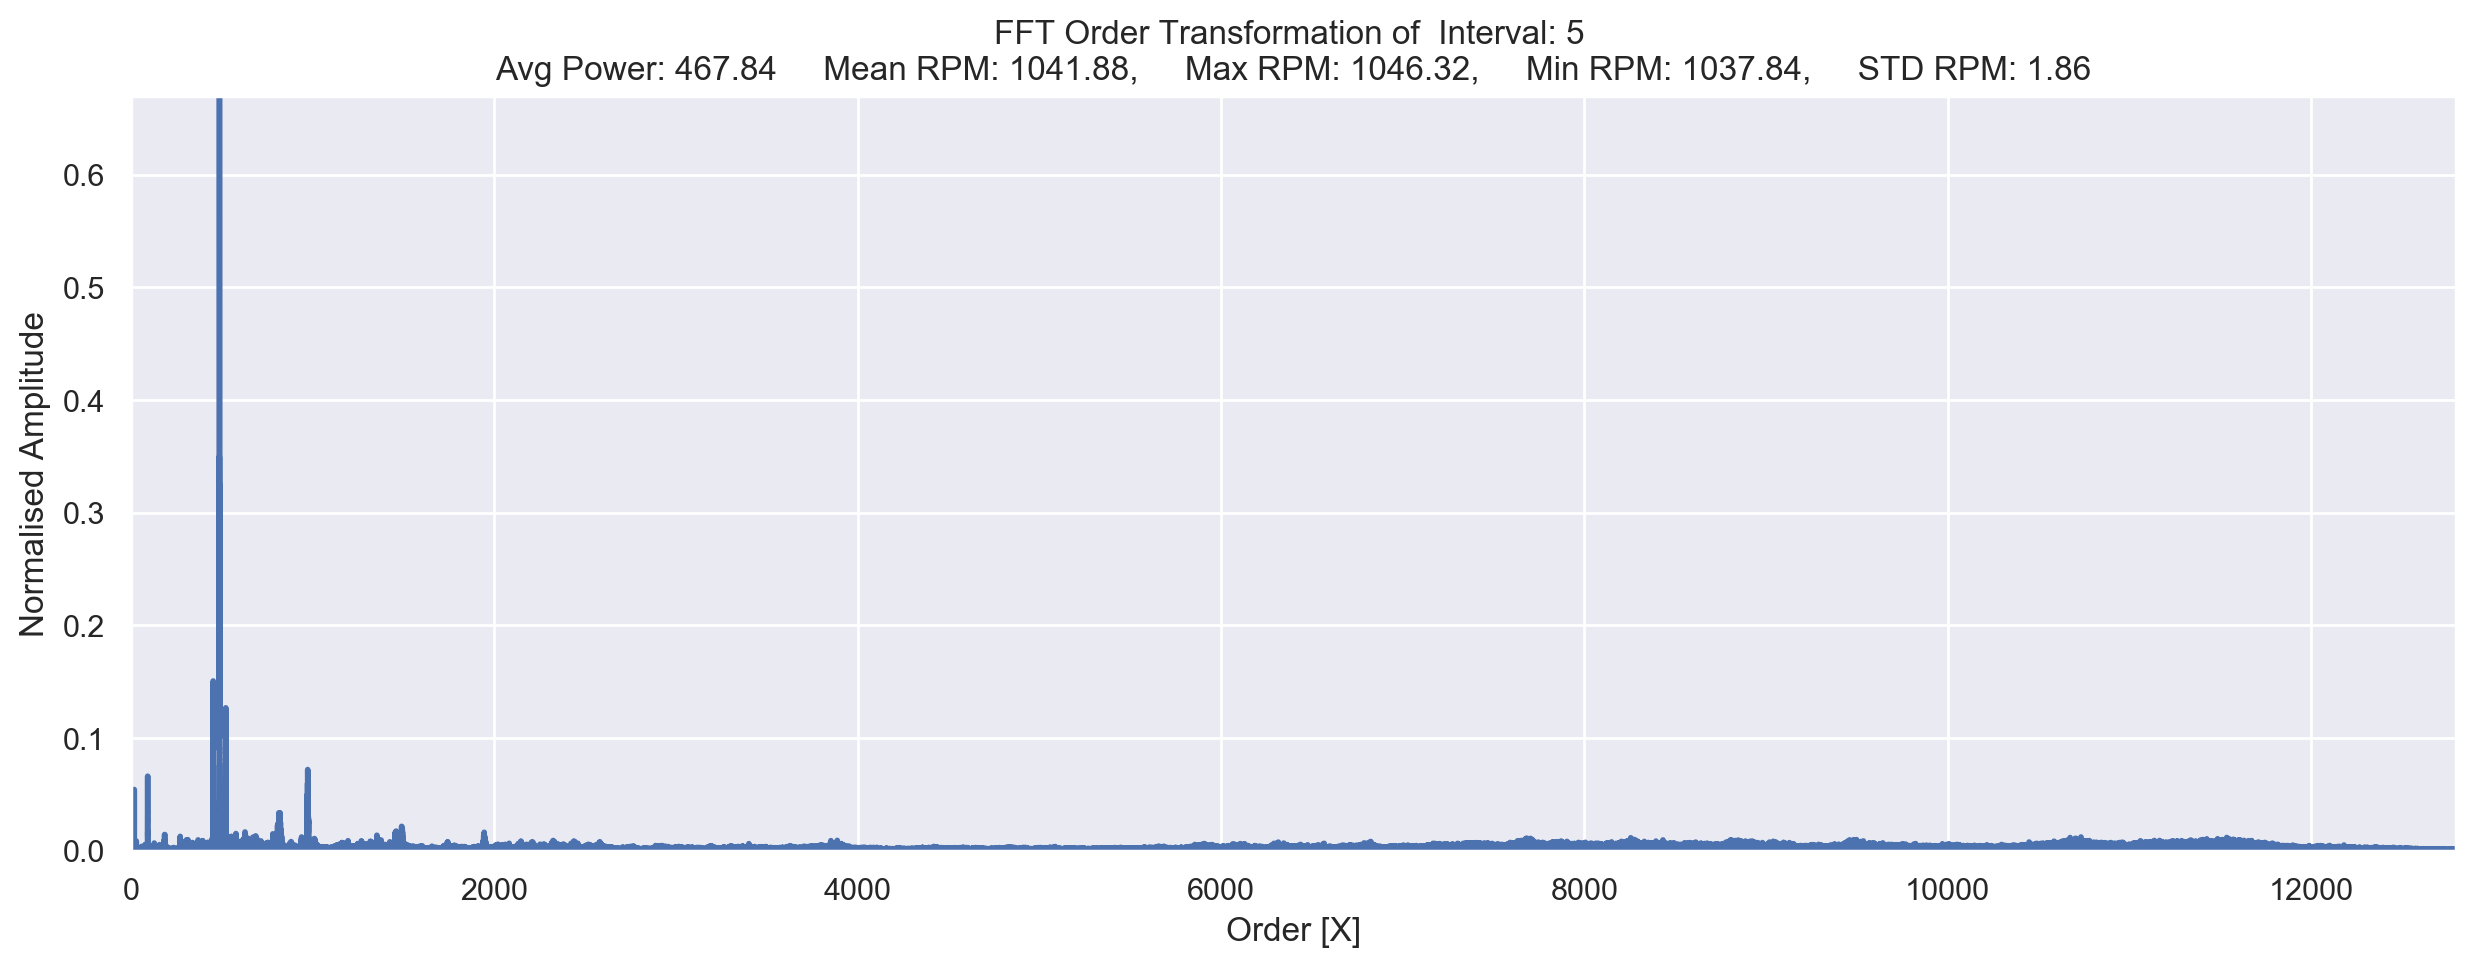

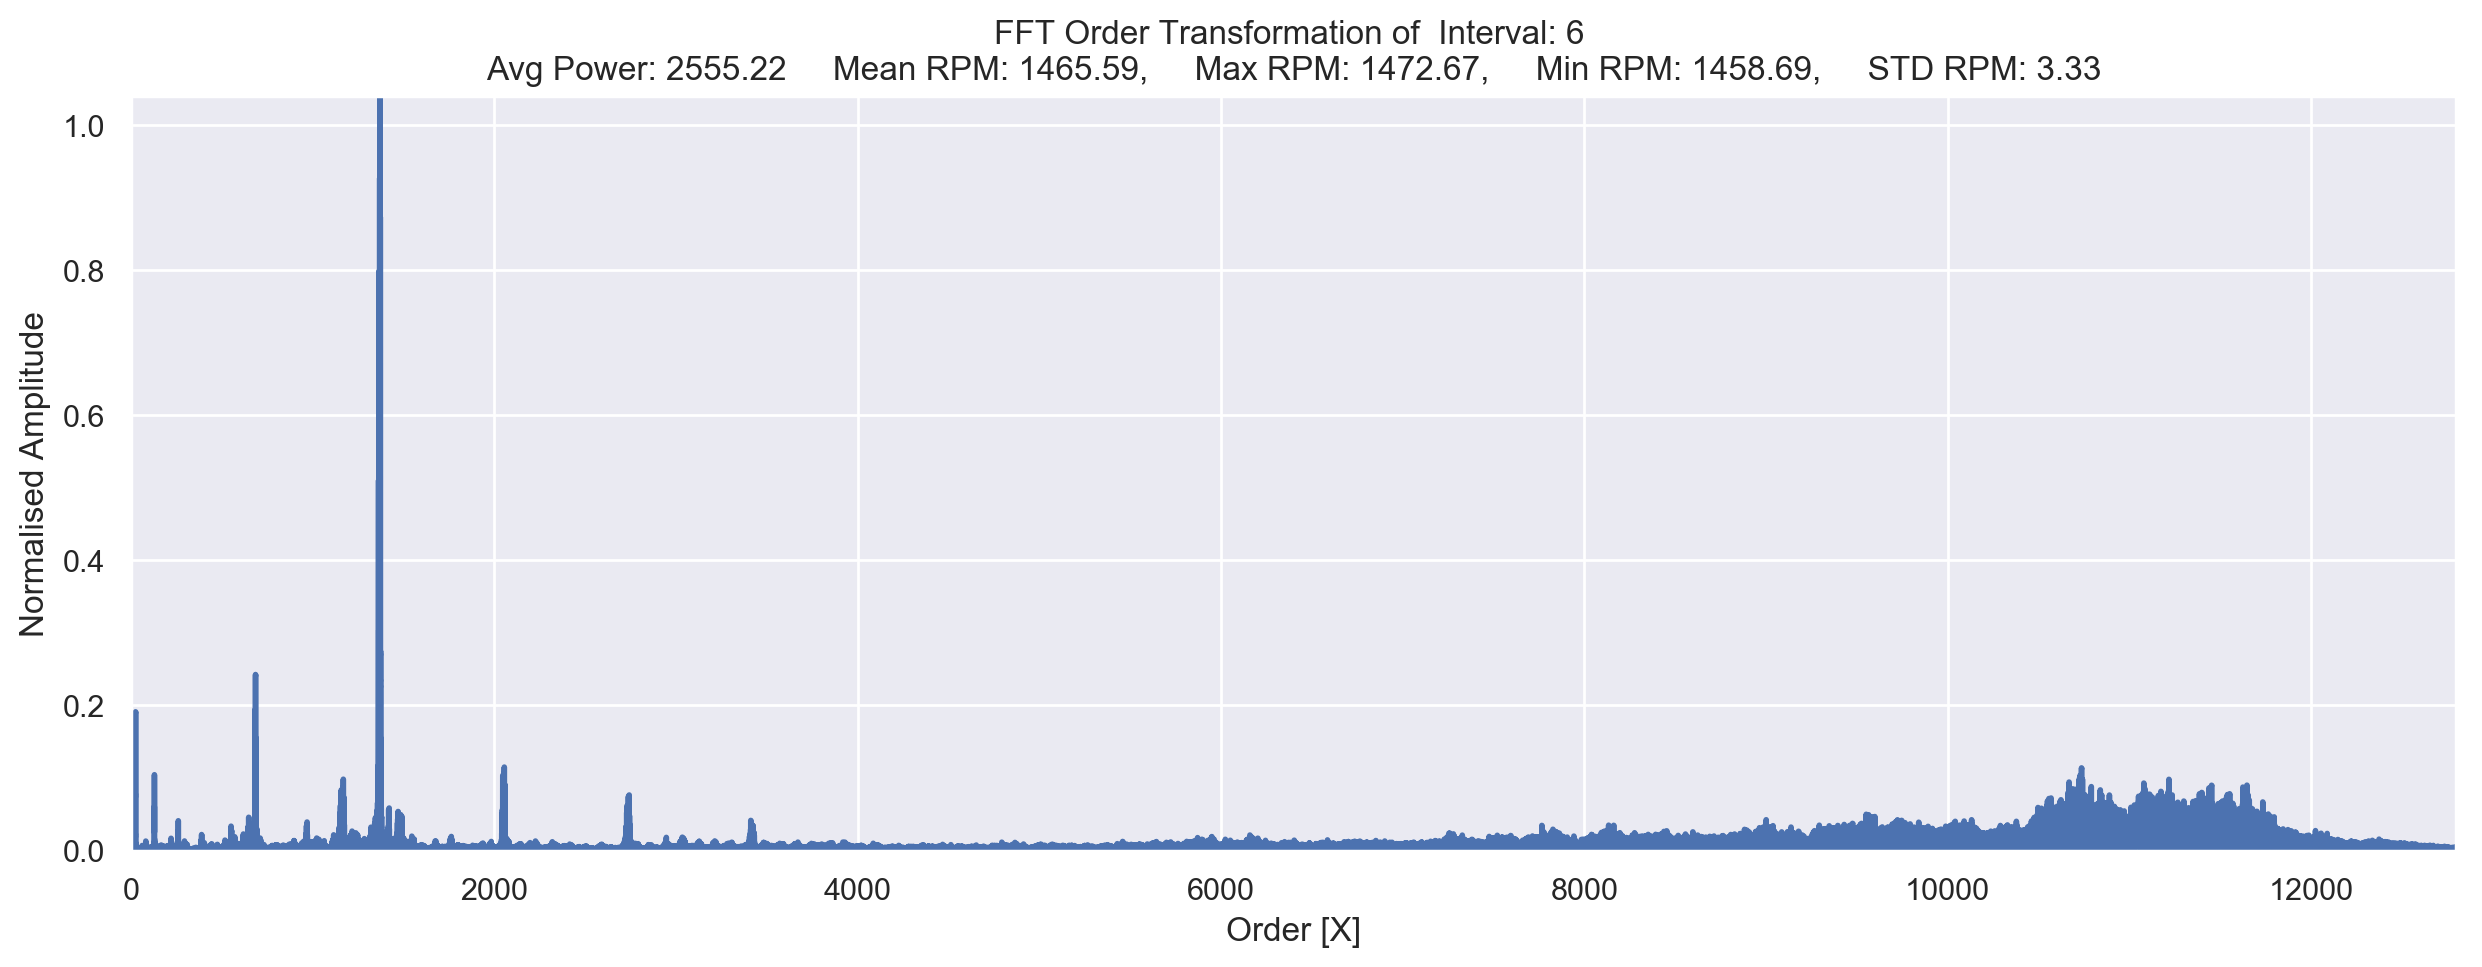

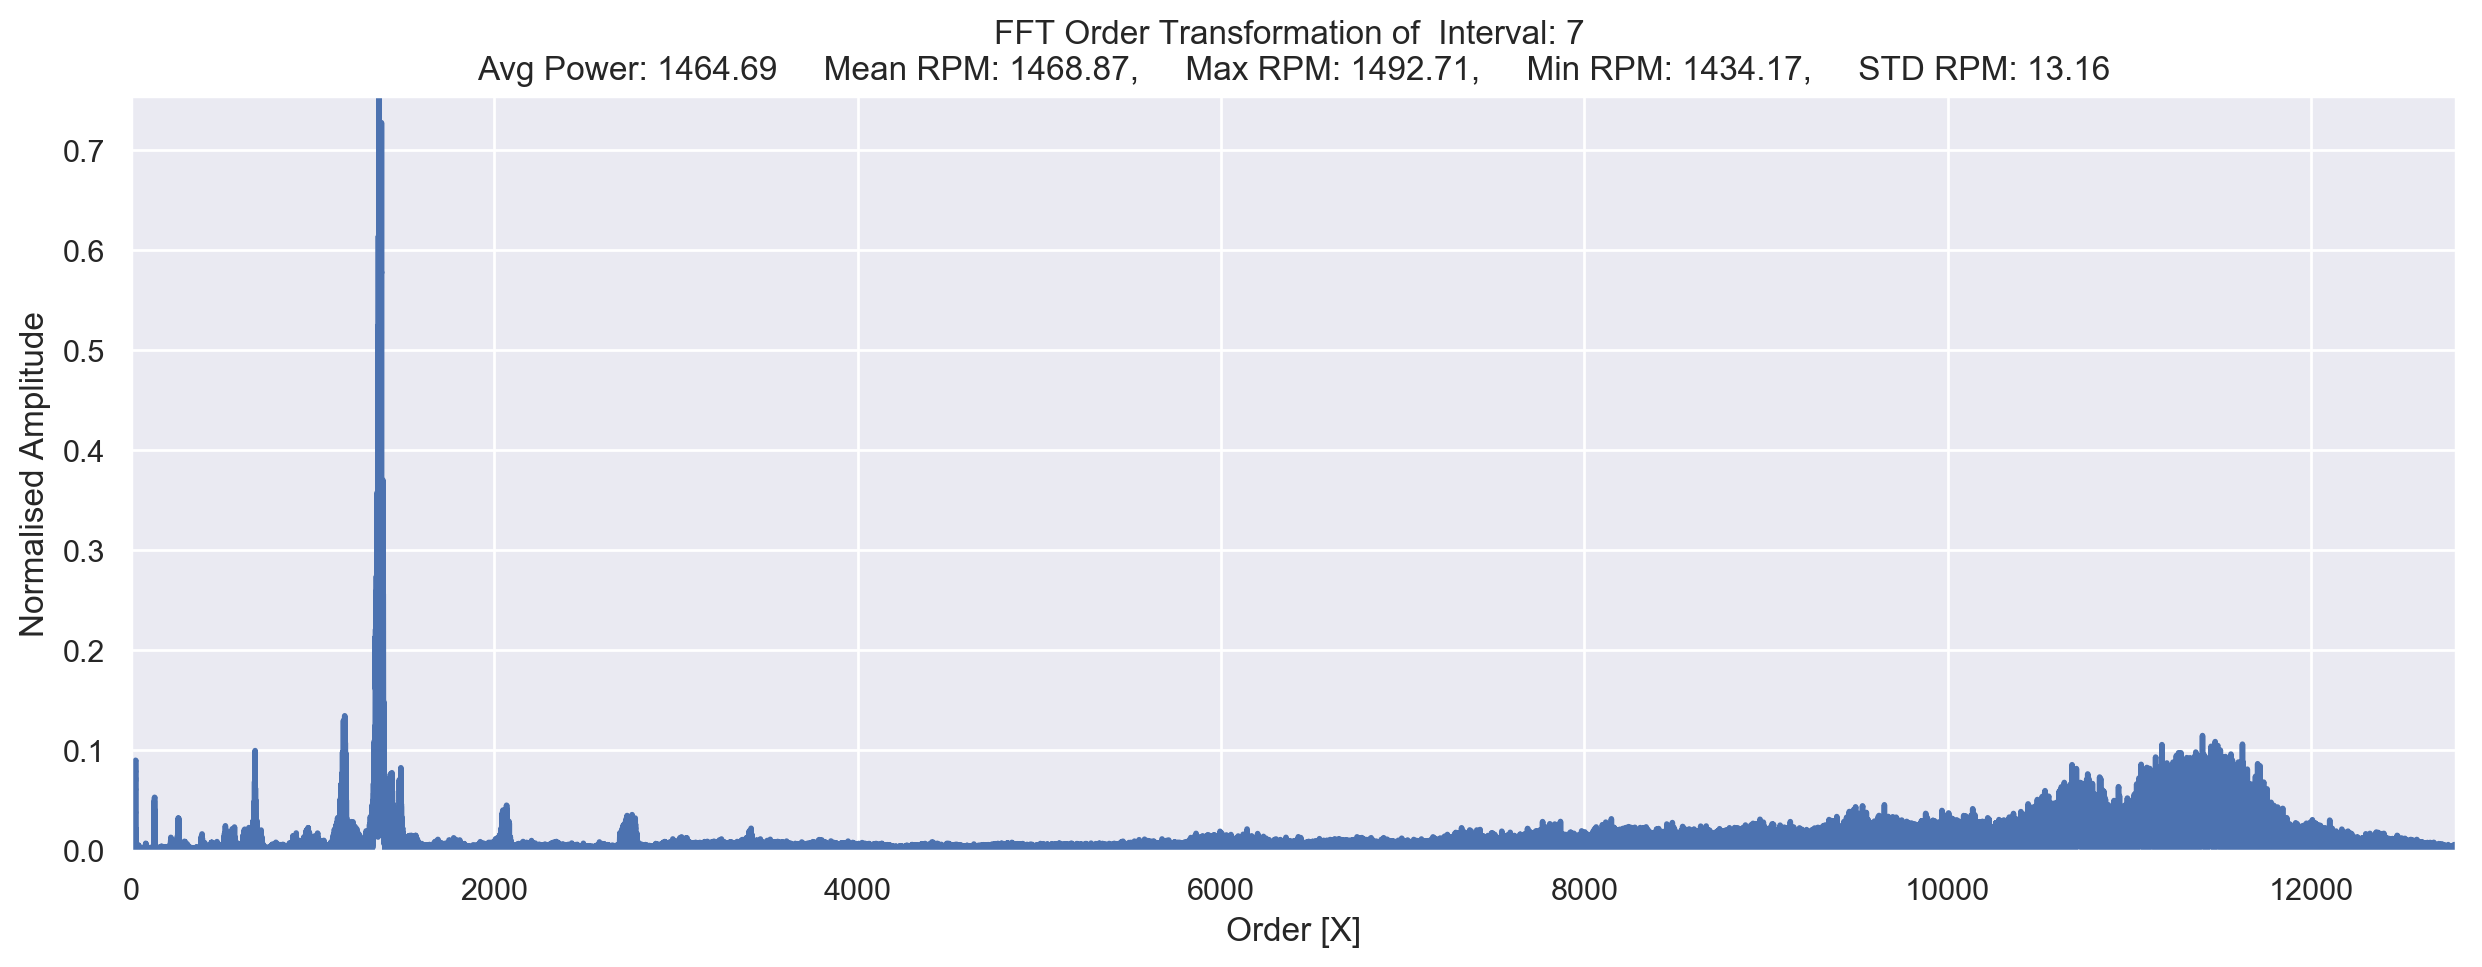

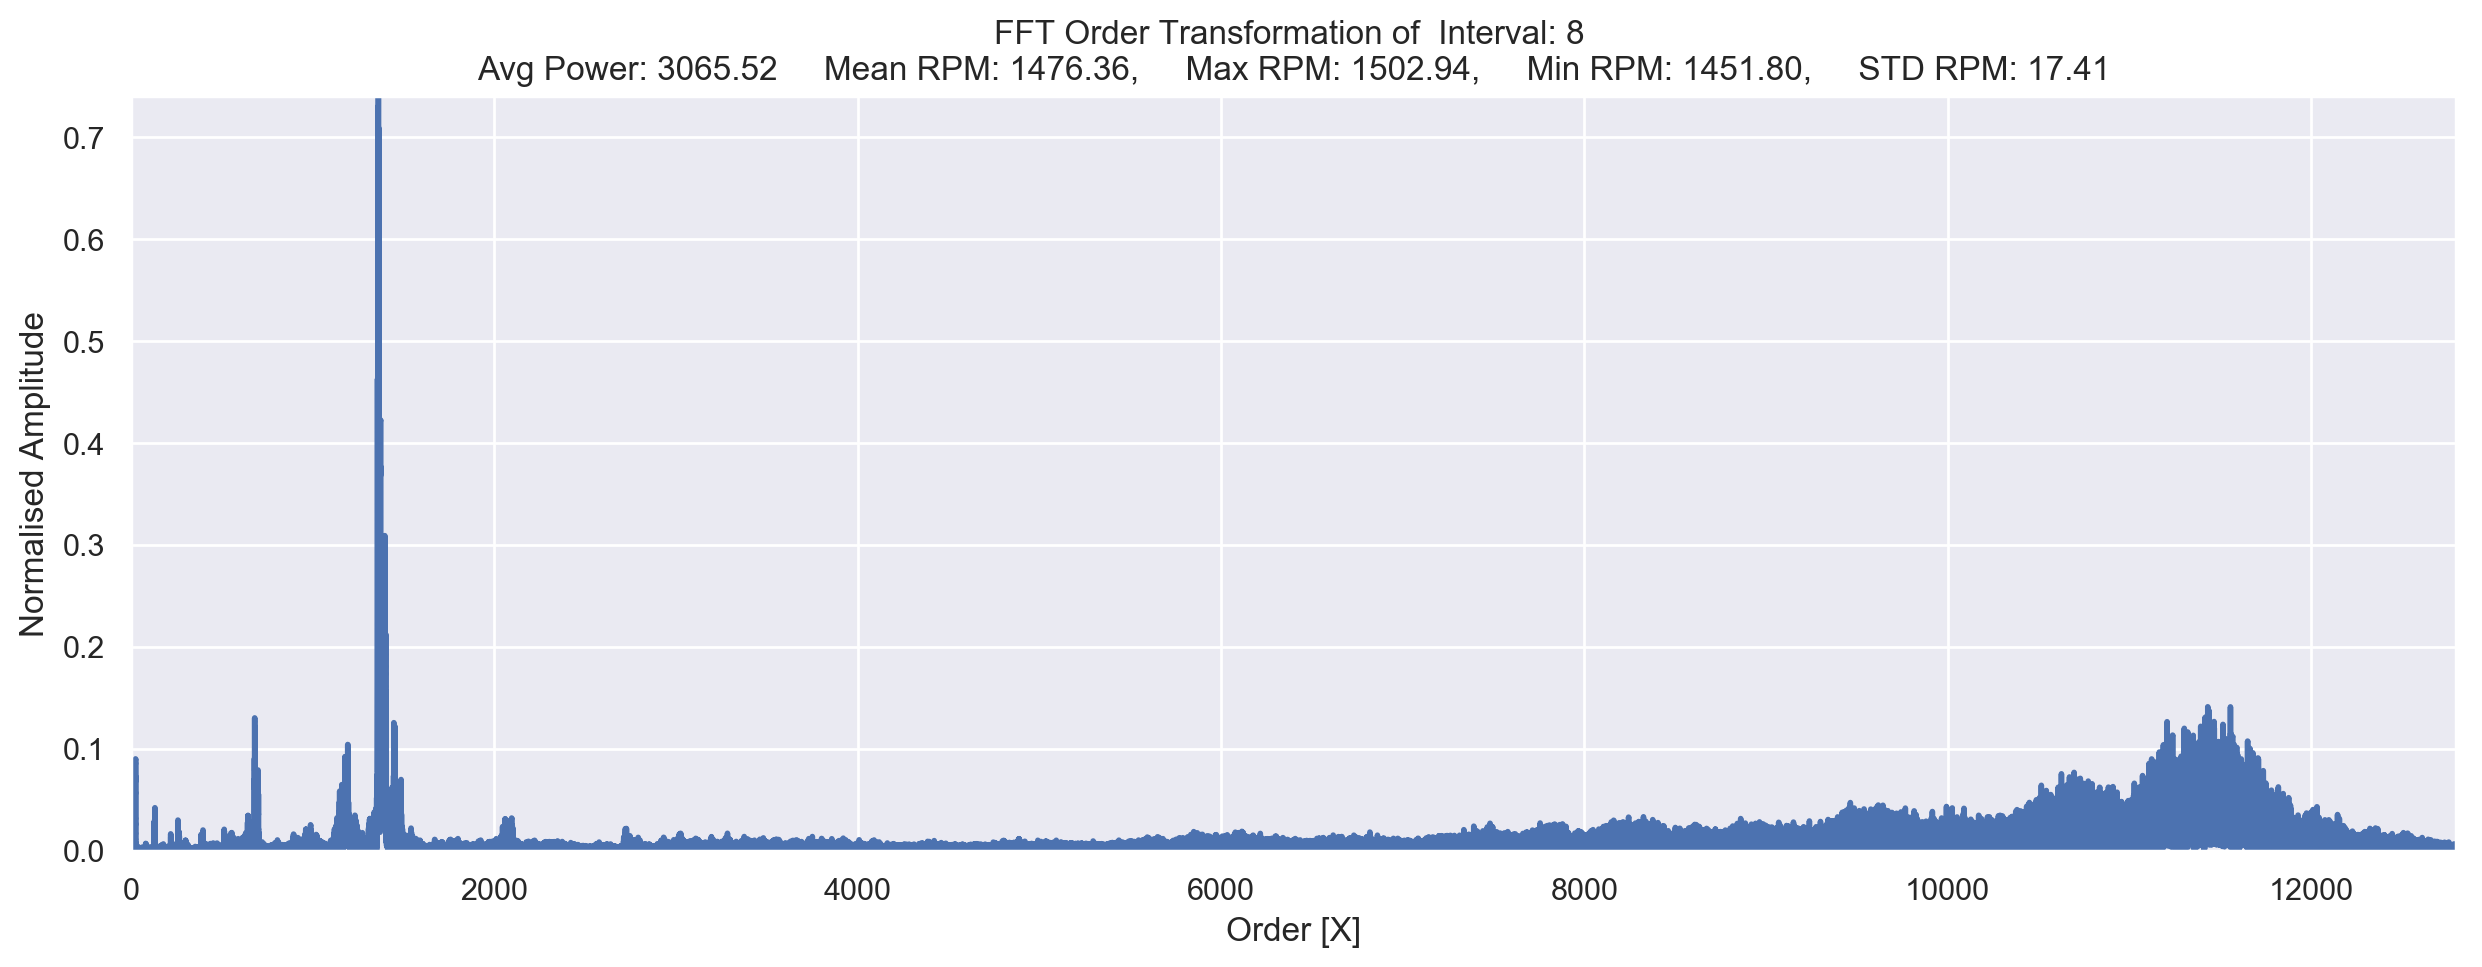

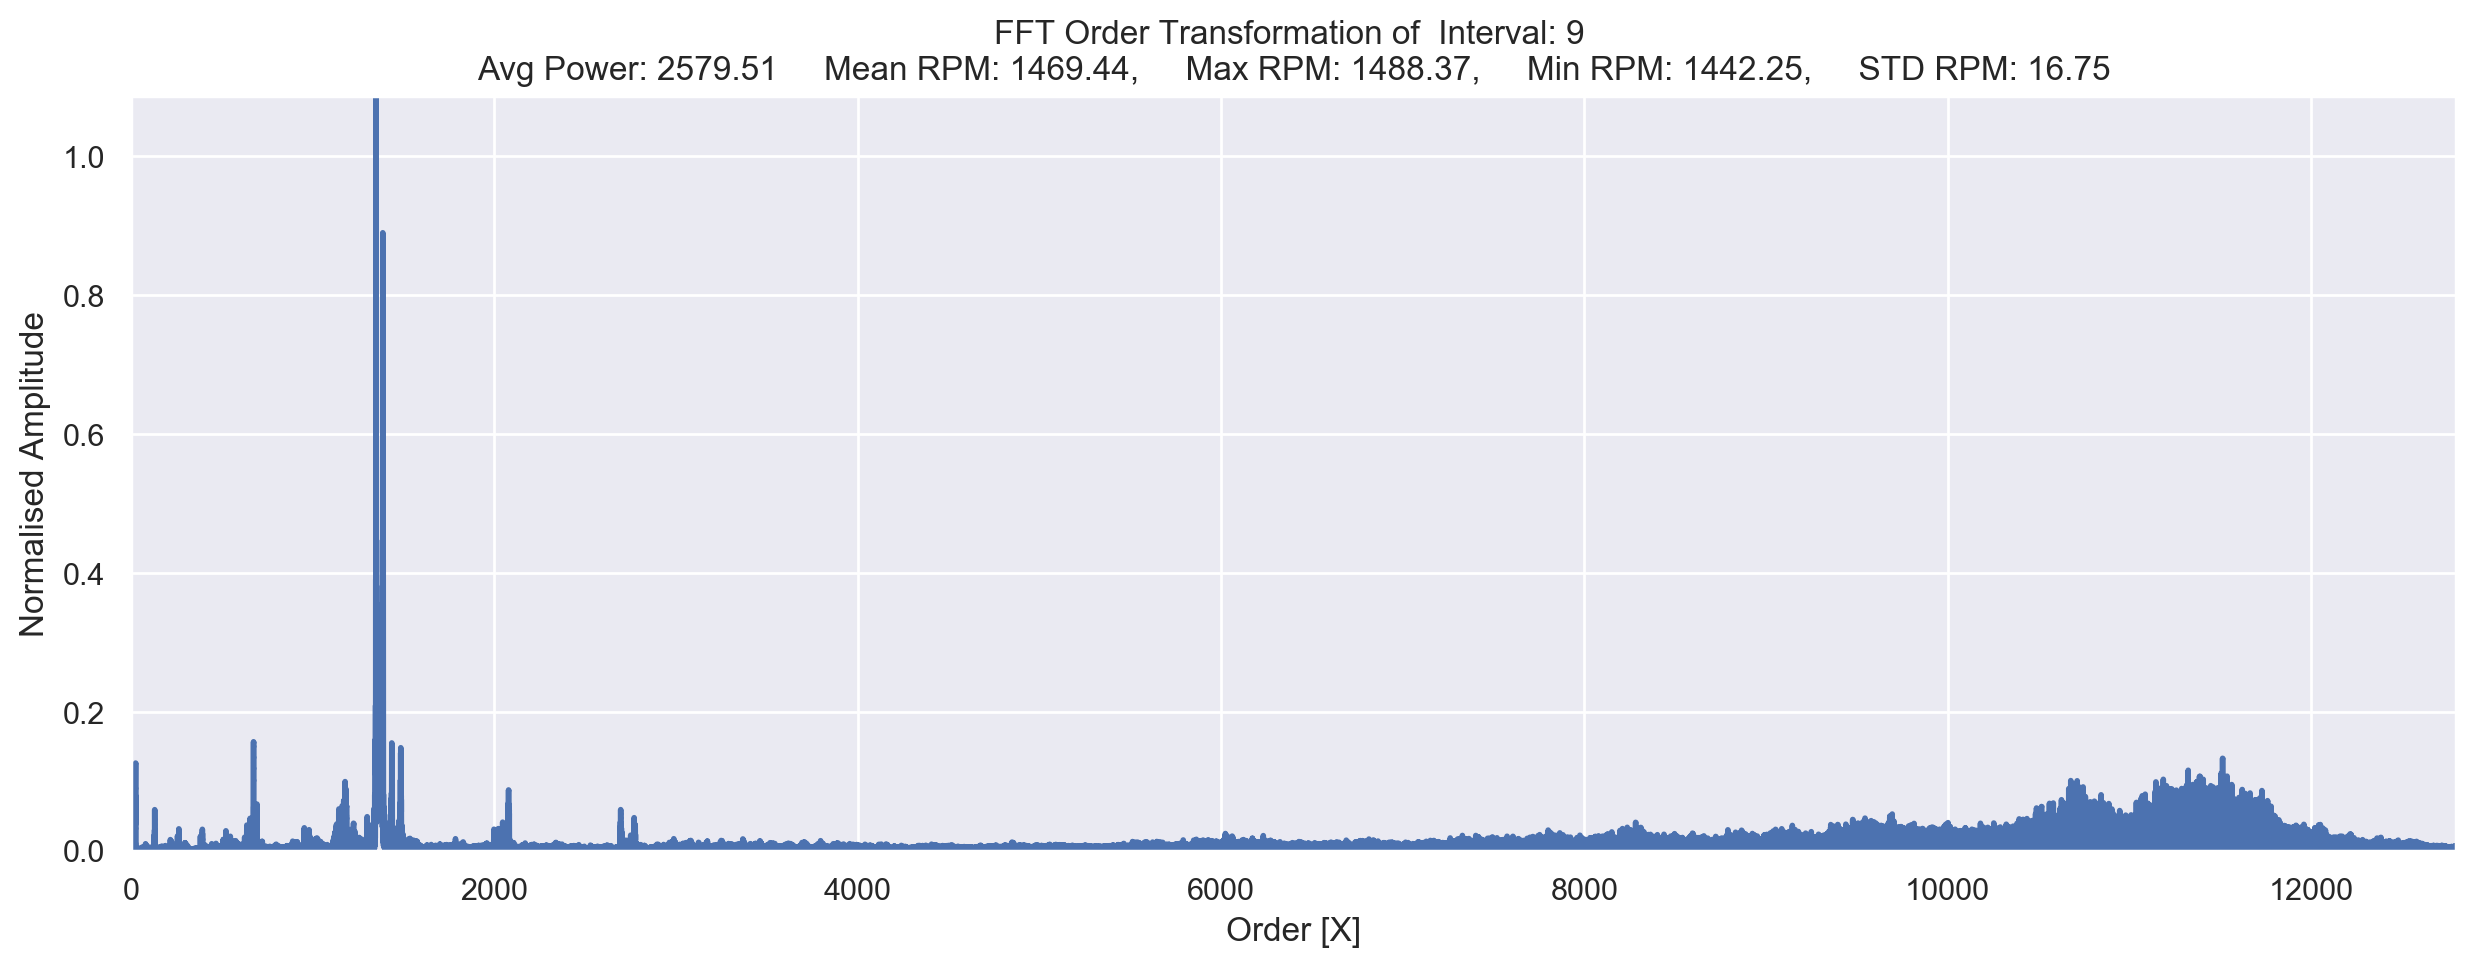

In [8]:
intervals = wt_instance.ten_second_intervals
sensor_name = 'GbxHssRr;0,0102;m/s2'
type = 'gearbox'

for i, interval in enumerate(intervals):
    if i > 9:
        break
        
    time_stamps = interval.sensor_df['TimeStamp']
    vibration_signal = interval.sensor_df[sensor_name]
    rot_data = interval.high_speed_rot_data
    avg_power = interval.op_df["PwrAvg;kW"][0]
    
    
    fast = ff_transform.FastFourierTransform(vibration_signal, time_stamps, type)
    fast.fft_transform_order(rot_data, avg_power, i, plot=True)